In [10]:

import os
from tqdm import tqdm
from itertools import chain
import pandas as pd
import numpy as np
import random, torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.2)
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [11]:
df = pd.read_excel('./performance_table.xlsx', skiprows=[0], index_col=[0, 1])
colors = sns.palettes.color_palette('hls', 4, desat = 1).as_hex()
colors

['#db5f57', '#91db57', '#57d3db', '#a157db']

In [12]:
ot = '#cccccc'
color_dict = {'LGBMsub':ot, 'RF':ot, 'Delta LGBMsub':ot, 'ChemProp':ot, 'DeepDelta':ot, 'ACANet':colors[2], }

y_label = '5x10-fold RMSE'
figsize = (2, 3)

Index(['Aqueous Solubility', 'Free Solvation', 'Caco2'], dtype='object')


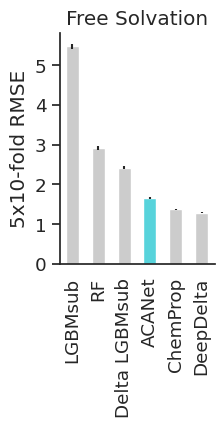

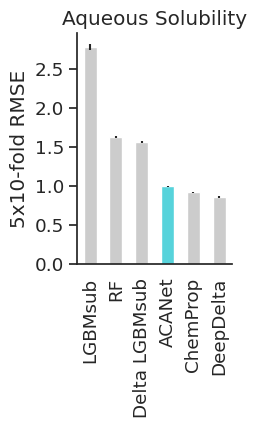

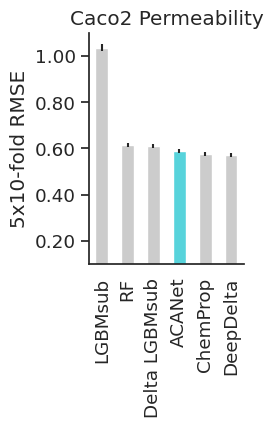

In [13]:
project = 'Absorption'

dfa = df.loc[project]
dfa_mean = dfa.applymap(lambda x:x.split('±')[0]).astype(float)
dfa_std = dfa.applymap(lambda x:x.split('±')[1]).astype(float)

print(dfa.index)


dataset = 'Free Solvation'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


dataset = 'Aqueous Solubility'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


dataset = 'Caco2'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset + ' Permeability')
ax.set_ylim(0.1, 1.1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


In [14]:
df

RF  \
Absorption   Aqueous Solubility                      1.623 ± 0.011   
             Free Solvation                          2.914 ± 0.045   
             Caco2                                    0.614 ± 0.01   
Distribution Volume of Distribution at Steady State  0.632 ± 0.003   
             Fraction Unbound, Brain                  0.928 ± 0.01   
Metabolism   Hepatic Clearance                       0.564 ± 0.002   
             Half-life                               0.762 ± 0.003   
             Microsomal Clearance                    0.544 ± 0.001   
Excretion    Renal Clearance                         0.337 ± 0.002   
Toxicity     Hemolytic Toxicity                      0.663 ± 0.005   

                                                          ChemProp  \
Absorption   Aqueous Solubility                      0.915 ± 0.008   
             Free Solvation                          1.372 ± 0.009   
             Caco2                                   0.575 ± 0.007   
Distribution Volume of Distribution at Steady State  0.670 ± 0.004   
             Fraction Unbound, Brain                 0.965 ± 0.019   
Metabolism   Hepatic Clearance                       0.570 ± 0.002   
             Half-life                               0.784 ± 0.004   
             Microsomal Clearance                    0.546 ± 0.005   
Excretion    Renal Clearance                         0.339 ± 0.005   
Toxicity     Hemolytic Toxicity                      0.729 ± 0.007   

                                                         DeepDelta  \
Absorption   Aqueous Solubility                      0.859 ± 0.012   
             Free Solvation                          1.290 ± 0.023   
             Caco2                                   0.572 ± 0.008   
Distribution Volume of Distribution at Steady State  0.618 ± 0.006   
             Fraction Unbound, Brain                 0.830 ± 0.023   
Metabolism   Hepatic Clearance                       0.622 ± 0.004   
             Half-life                               0.778 ± 0.004   
             Microsomal Clearance                    0.557 ± 0.002   
Excretion    Renal Clearance                         0.350 ± 0.008   
Toxicity     Hemolytic Toxicity                      0.635 ± 0.006   

                                                           LGBMsub  \
Absorption   Aqueous Solubility                      2.783 ± 0.038   
             Free Solvation                          5.472 ± 0.064   
             Caco2                                   1.036 ± 0.014   
Distribution Volume of Distribution at Steady State  0.969 ± 0.008   
             Fraction Unbound, Brain                 1.311 ± 0.014   
Metabolism   Hepatic Clearance                       0.663 ± 0.008   
             Half-life                               0.849 ± 0.003   
             Microsomal Clearance                    0.638 ± 0.005   
Excretion    Renal Clearance                         0.396 ± 0.004   
Toxicity     Hemolytic Toxicity                       1.127 ± 0.01   

                                                     Delta LGBMsub  \
Absorption   Aqueous Solubility                      1.562 ± 0.011   
             Free Solvation                          2.415 ± 0.037   
             Caco2                                    0.61 ± 0.007   
Distribution Volume of Distribution at Steady State   0.64 ± 0.003   
             Fraction Unbound, Brain                 0.939 ± 0.014   
Metabolism   Hepatic Clearance                       0.575 ± 0.005   
             Half-life                               0.771 ± 0.002   
             Microsomal Clearance                    0.556 ± 0.003   
Excretion    Renal Clearance                         0.344 ± 0.002   
Toxicity     Hemolytic Toxicity                      0.672 ± 0.005   

                                                            ACANet  
Absorption   Aqueous Solubility                      0.995 ± 0.005  
             Free Solvation                          1.653 ± 0.025  
  

Index(['Volume of Distribution at Steady State', 'Fraction Unbound, Brain'], dtype='object')


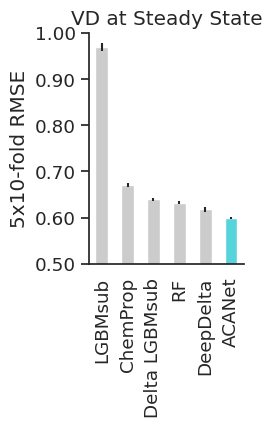

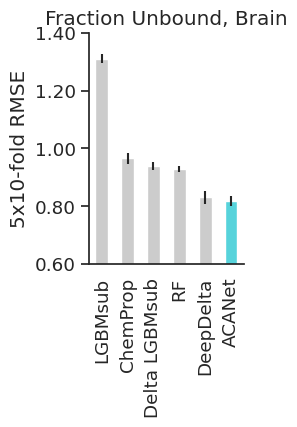

In [15]:
project = 'Distribution'

dfa = df.loc[project]
dfa_mean = dfa.applymap(lambda x:x.split('±')[0]).astype(float)
dfa_std = dfa.applymap(lambda x:x.split('±')[1]).astype(float)

print(dfa.index)


dataset = 'Volume of Distribution at Steady State'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title('VD at Steady State')
ax.set_ylim(0.5, 1.0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


dataset = 'Fraction Unbound, Brain'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
ax.set_ylim(0.6, 1.4)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )



Index(['Hepatic Clearance', 'Half-life', 'Microsomal Clearance'], dtype='object')


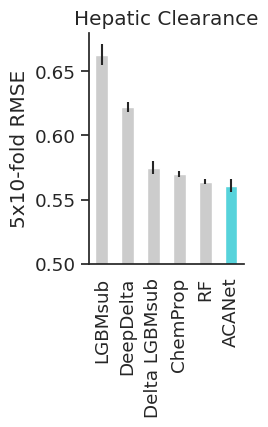

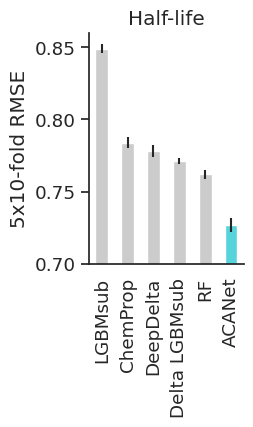

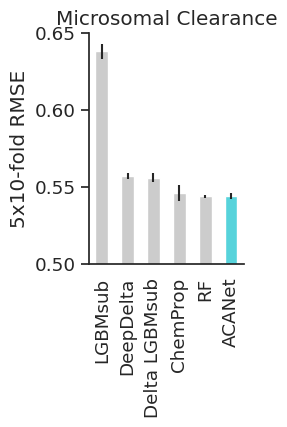

In [16]:
project = 'Metabolism'

dfa = df.loc[project]
dfa_mean = dfa.applymap(lambda x:x.split('±')[0]).astype(float)
dfa_std = dfa.applymap(lambda x:x.split('±')[1]).astype(float)

print(dfa.index)


dataset = 'Hepatic Clearance'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
ax.set_ylim(0.5, 0.68)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.05))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


dataset = 'Half-life'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
ax.set_ylim(0.7, 0.86)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.05))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


dataset = 'Microsomal Clearance'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
ax.set_ylim(0.5, 0.65)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.05))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )


Index(['Renal Clearance'], dtype='object')


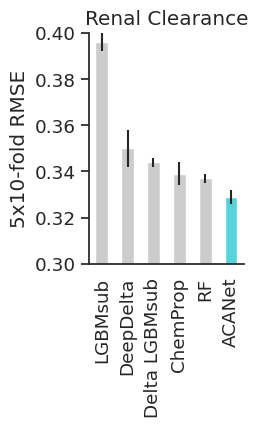

In [17]:
project = 'Excretion'

dfa = df.loc[project]
dfa_mean = dfa.applymap(lambda x:x.split('±')[0]).astype(float)
dfa_std = dfa.applymap(lambda x:x.split('±')[1]).astype(float)

print(dfa.index)


dataset = 'Renal Clearance'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
ax.set_ylim(0.3, 0.4)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.02))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )



Index(['Hemolytic Toxicity'], dtype='object')


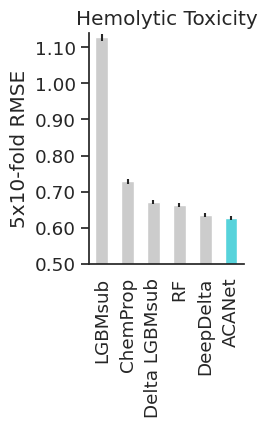

In [18]:
project = 'Toxicity'

dfa = df.loc[project]
dfa_mean = dfa.applymap(lambda x:x.split('±')[0]).astype(float)
dfa_std = dfa.applymap(lambda x:x.split('±')[1]).astype(float)

print(dfa.index)


dataset = 'Hemolytic Toxicity'
y = dfa_mean.loc[dataset]
y_err = dfa_std.loc[dataset]

order = y.sort_values(ascending=False).index
y = y.loc[order]
y_err = y_err.loc[order]


fig, ax = plt.subplots(figsize=figsize)

colors = pd.Series(color_dict).loc[order].tolist()

y.plot(kind='bar', yerr  = y_err, color = colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(y_label)
ax.set_title(dataset)
ax.set_ylim(0.5, 1.14)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

fig.savefig('./bar_%s_%s.svg' % (project, dataset), bbox_inches = 'tight', dpi= 96 )



In [19]:
df

RF  \
Absorption   Aqueous Solubility                      1.623 ± 0.011   
             Free Solvation                          2.914 ± 0.045   
             Caco2                                    0.614 ± 0.01   
Distribution Volume of Distribution at Steady State  0.632 ± 0.003   
             Fraction Unbound, Brain                  0.928 ± 0.01   
Metabolism   Hepatic Clearance                       0.564 ± 0.002   
             Half-life                               0.762 ± 0.003   
             Microsomal Clearance                    0.544 ± 0.001   
Excretion    Renal Clearance                         0.337 ± 0.002   
Toxicity     Hemolytic Toxicity                      0.663 ± 0.005   

                                                          ChemProp  \
Absorption   Aqueous Solubility                      0.915 ± 0.008   
             Free Solvation                          1.372 ± 0.009   
             Caco2                                   0.575 ± 0.007   
Distribution Volume of Distribution at Steady State  0.670 ± 0.004   
             Fraction Unbound, Brain                 0.965 ± 0.019   
Metabolism   Hepatic Clearance                       0.570 ± 0.002   
             Half-life                               0.784 ± 0.004   
             Microsomal Clearance                    0.546 ± 0.005   
Excretion    Renal Clearance                         0.339 ± 0.005   
Toxicity     Hemolytic Toxicity                      0.729 ± 0.007   

                                                         DeepDelta  \
Absorption   Aqueous Solubility                      0.859 ± 0.012   
             Free Solvation                          1.290 ± 0.023   
             Caco2                                   0.572 ± 0.008   
Distribution Volume of Distribution at Steady State  0.618 ± 0.006   
             Fraction Unbound, Brain                 0.830 ± 0.023   
Metabolism   Hepatic Clearance                       0.622 ± 0.004   
             Half-life                               0.778 ± 0.004   
             Microsomal Clearance                    0.557 ± 0.002   
Excretion    Renal Clearance                         0.350 ± 0.008   
Toxicity     Hemolytic Toxicity                      0.635 ± 0.006   

                                                           LGBMsub  \
Absorption   Aqueous Solubility                      2.783 ± 0.038   
             Free Solvation                          5.472 ± 0.064   
             Caco2                                   1.036 ± 0.014   
Distribution Volume of Distribution at Steady State  0.969 ± 0.008   
             Fraction Unbound, Brain                 1.311 ± 0.014   
Metabolism   Hepatic Clearance                       0.663 ± 0.008   
             Half-life                               0.849 ± 0.003   
             Microsomal Clearance                    0.638 ± 0.005   
Excretion    Renal Clearance                         0.396 ± 0.004   
Toxicity     Hemolytic Toxicity                       1.127 ± 0.01   

                                                     Delta LGBMsub  \
Absorption   Aqueous Solubility                      1.562 ± 0.011   
             Free Solvation                          2.415 ± 0.037   
             Caco2                                    0.61 ± 0.007   
Distribution Volume of Distribution at Steady State   0.64 ± 0.003   
             Fraction Unbound, Brain                 0.939 ± 0.014   
Metabolism   Hepatic Clearance                       0.575 ± 0.005   
             Half-life                               0.771 ± 0.002   
             Microsomal Clearance                    0.556 ± 0.003   
Excretion    Renal Clearance                         0.344 ± 0.002   
Toxicity     Hemolytic Toxicity                      0.672 ± 0.005   

                                                            ACANet  
Absorption   Aqueous Solubility                      0.995 ± 0.005  
             Free Solvation                          1.653 ± 0.025  
  